In [40]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [175]:
df = pd.read_csv('datasets/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [177]:
# Affichage de toutes les lignes du dataFrame
# pd.set_option('display.max_columns',df.shape[1]+1)

In [178]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [179]:
# Affichage de toutes les lignes du dataFrame
# pd.set_option('display.max_rows',df.shape[0]+1)

In [180]:
# 3.2 Vérification des valeurs nulles
df.isnull().sum().sort_values(ascending=False)

Flow Bytes/s             4
 Destination Port        0
 Bwd Avg Bytes/Bulk      0
 Fwd Avg Packets/Bulk    0
Fwd Avg Bytes/Bulk       0
                        ..
 Bwd IAT Mean            0
Bwd IAT Total            0
 Fwd IAT Min             0
 Fwd IAT Max             0
 Label                   0
Length: 79, dtype: int64

In [181]:
df[' Label'].value_counts()

 Label
DDoS      128027
BENIGN     97718
Name: count, dtype: int64

In [182]:
# Retour à l'affichage des dix lignes 
pd.set_option('display.max_rows',10)

In [183]:
df[df['Flow Bytes/s']==float('inf')]

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
65,55043,0,2,0,12,0,6,6,6.0,0.000000,0,0,0.0,0.0,inf,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,4737,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1767,60018,0,2,0,12,0,6,6,6.0,0.000000,0,0,0.0,0.0,inf,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,5114,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1890,80,0,1,1,6,6,6,6,6.0,0.000000,6,6,6.0,0.0,inf,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,258,335,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3375,443,0,1,1,6,6,6,6,6.0,0.000000,6,6,6.0,0.0,inf,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,252,114,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8057,35382,0,1,1,6,0,6,6,6.0,0.000000,0,0,0.0,0.0,inf,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,32,0.0,0.0,0,6,4.000000,3.464102,12.000000,1,0,0,0,0,0,0,0,1,6.0,6.0,0.0,20,0,0,0,0,0,0,1,6,1,0,0,322,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213594,60687,0,2,0,37,0,31,6,18.5,17.677670,0,0,0.0,0.0,inf,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,1,0,0,0,40,0,0.0,0.0,6,31,22.666667,14.433757,208.333333,0,1,0,0,1,0,0,0,0,34.0,18.5,0.0,40,0,0,0,0,0,0,2,37,0,0,110,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
214432,60623,0,2,0,12,0,6,6,6.0,0.000000,0,0,0.0,0.0,inf,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,123,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
214453,10413,0,2,0,37,0,31,6,18.5,17.677670,0,0,0.0,0.0,inf,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,1,0,0,0,40,0,0.0,0.0,6,31,22.666667,14.433757,208.333333,0,1,0,0,1,0,0,0,0,34.0,18.5,0.0,40,0,0,0,0,0,0,2,37,0,0,31,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
215026,389,0,2,0,7,0,7,0,3.5,4.949747,0,0,0.0,0.0,inf,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,1,0,0,0,64,0,0.0,0.0,0,7,4.666667,4.041452,16.333333,0,1,0,0,1,0,0,0,0,7.0,3.5,0.0,64,0,0,0,0,0,0,2,7,0,0,237,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [184]:
# df['Flow Bytes/s'].value_counts()

In [185]:
df[df['Flow Bytes/s'].isnull()]

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
6796,36812,0,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,64,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,64,0,0,0,0,0,0,2,0,0,0,7633,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
14739,53581,0,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,44,32,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,1,0.0,0.0,0.0,44,0,0,0,0,0,0,1,0,1,0,408,65535,0,44,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
15047,80,0,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,64,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,64,0,0,0,0,0,0,2,0,0,0,274,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
209728,18467,0,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,64,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,64,0,0,0,0,0,0,2,0,0,0,229,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


#### Renseignement des données manquantes sur la colonne 'Flow Bytes/s'

In [186]:
# Remarque : Nous allons remplacer les valeurs manquantes par 0 des valeurs dans la colonne

In [187]:
df['Flow Bytes/s'] = df['Flow Bytes/s'].replace([np.inf,-np.inf],0)

In [188]:
df['Flow Bytes/s'] = df['Flow Bytes/s'].fillna(0.0)

In [189]:
# df['Flow Bytes/s'] = df['Flow Bytes/s'].round(5)

### Conversion du Label du type object en numérique

In [190]:
label_values = {'DDoS':1,'BENIGN':0}
df[' Label'] = df[' Label'].map(label_values)

In [191]:
df[' Label'].value_counts()

 Label
1    128027
0     97718
Name: count, dtype: int64

### Conversion des champs en float inf en 0

In [192]:
def inf_conversion(df): 
    return df.replace([np.inf,-np.inf],0)

In [193]:
df = inf_conversion(df)

### Conversion des champs en float en 5 rangs après la virgule

In [194]:
def arrondir_dataframe(df): 
    return df.apply(lambda x: round(x,5) if isinstance(x,float) else x)

In [195]:
df = arrondir_dataframe(df)

### Corrélation

In [196]:
#plt.figure(figsize=(10,5))
#sns.heatmap(df.corr(),cmap='viridis',annot=True);

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

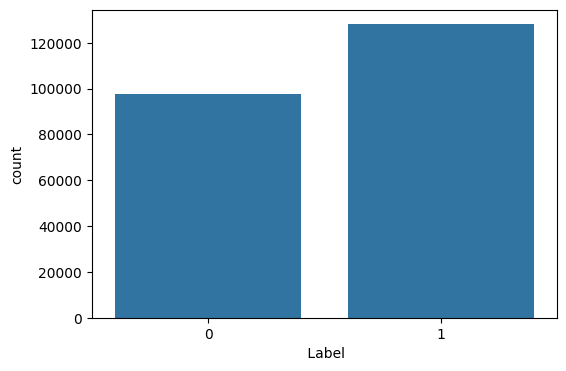

In [198]:
# Le label : Loan_Status
plt.figure(figsize=(6,4))
sns.countplot(x=' Label',data=df);

In [199]:
# Le pourcentage d'octroi de crédit
percent_ddos=round(df[' Label'].value_counts()[1]/len(df[' Label'])*100,2)
percent_not_ddos=round(df[' Label'].value_counts()[0]/len(df[' Label'])*100,2)
print(f'le pourcentage des attaques ddos est de : {percent_ddos}%')
print(f'le pourcentage des attaques favorables est de : {percent_not_ddos}%')

le pourcentage des attaques ddos est de : 56.71%
le pourcentage des attaques favorables est de : 43.29%


In [200]:
# Séparer les features et le label
X = df.drop(' Label',axis=1)
y = df[' Label']

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
# Fractionnement du dataset en set d'entrainement et de test
# test_size est de 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [203]:
print('X_train est de : ', X_train.shape)
print('X_test est de : ', X_test.shape)
print('y_train est de : ', y_train.shape)
print('y_test est de : ', y_test.shape)

X_train est de :  (158021, 78)
X_test est de :  (67724, 78)
y_train est de :  (158021,)
y_test est de :  (67724,)


In [204]:
# Mise à l'échelle des données (Normalisation des données)
from sklearn.preprocessing import StandardScaler

In [205]:
scaler = StandardScaler()

In [206]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [207]:
# MODELE DE REGRESSION LOGISTIQUE AVEC UNE CROSS VALIDATION

In [208]:
# Première solution : modèle LogisticRegressionCV
from sklearn.linear_model import LogisticRegressionCV 

In [209]:
log_model = LogisticRegressionCV()

In [210]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [211]:
log_model.C_

array([21.5443469])

In [212]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [213]:
# Les coefficients des features
log_model.coef_

array([[ -7.51647889,  -5.84353284,   7.34545084,  -9.22645139,
        -11.72340897,  -8.09544392,  -4.57634084,  -0.04559794,
         -3.43926841,  -4.43585718,  -1.61166565,   0.0687141 ,
         -3.44197331,  -2.31176759,   0.4022645 ,  -0.09679246,
          9.93737504,   3.46363571,  -4.58657254,  -0.37181732,
         -3.68907061,  -4.76802244,   3.10593851,  -1.77743256,
         -6.85799215,  -0.25377445,  -3.51137466,  -2.89084717,
         -1.35907975,  -1.50847324,  -4.9566142 ,   0.        ,
          0.        ,   0.        ,  -2.28141265,  -8.48680037,
         -0.11904646,   0.09708492,  -8.49027826,  -1.07752424,
          7.9897294 ,   1.94900715,   9.94423528,   0.06602304,
         -4.9566142 ,   0.041117  ,  16.47509972,  17.39687804,
         -0.60729331,   0.        ,   0.041117  ,   1.64876723,
          7.72640297,  -3.43926841,  -3.44197331,  -2.28141265,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   7.

In [214]:
coefficients = pd.Series(index=X.columns,data=log_model.coef_[0])

In [215]:
coefficients = coefficients.sort_values()

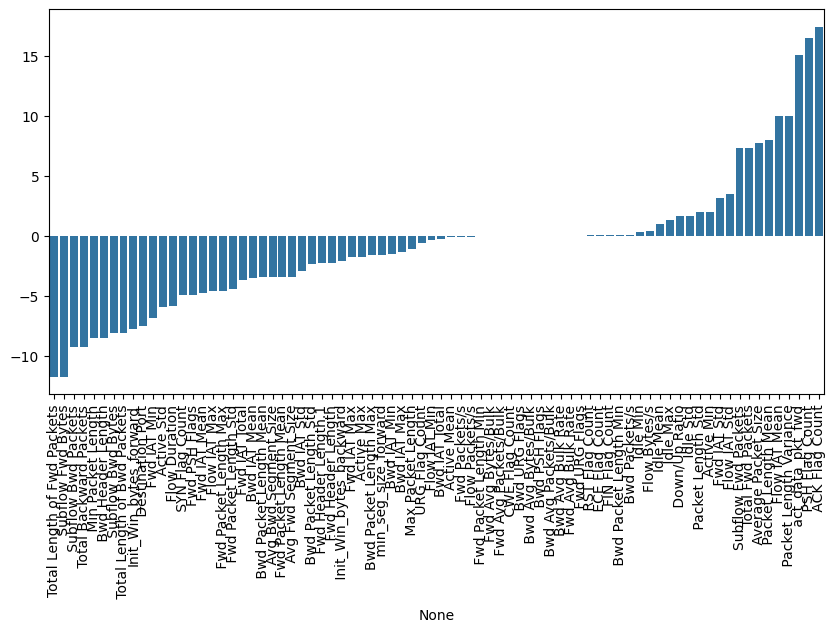

In [216]:
plt.figure(figsize=(10,5))
sns.barplot(x=coefficients.index,y=coefficients.values);
plt.xticks(rotation=90);

In [217]:
# EVALUATION DES PERFORMANCES DU MODELE

In [224]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

In [219]:
y_pred = log_model.predict(scaled_X_test)

In [220]:
confusion_matrix(y_test,y_pred)

array([[29275,    41],
       [   42, 38366]], dtype=int64)

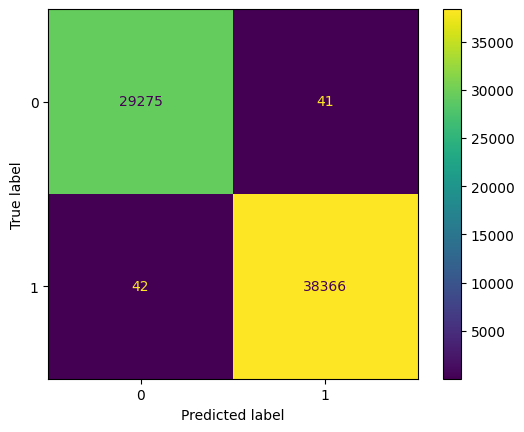

In [221]:
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test);

In [222]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29316
           1       1.00      1.00      1.00     38408

    accuracy                           1.00     67724
   macro avg       1.00      1.00      1.00     67724
weighted avg       1.00      1.00      1.00     67724



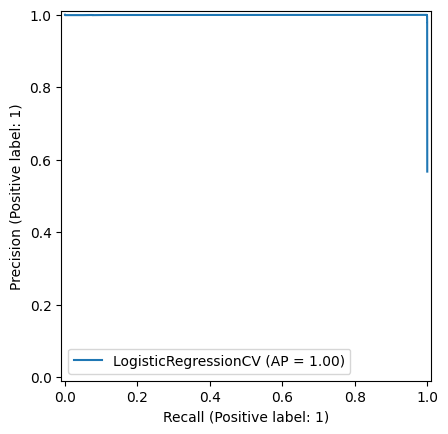

In [225]:
PrecisionRecallDisplay.from_estimator(log_model,scaled_X_test,y_test);

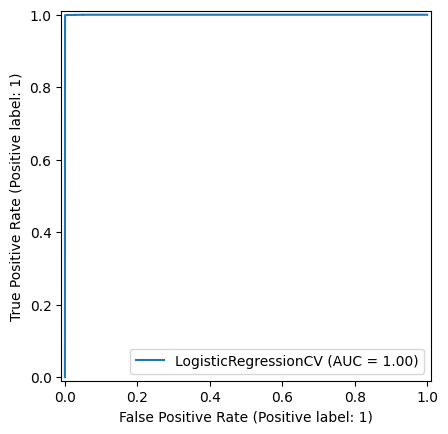

In [226]:
RocCurveDisplay.from_estimator(log_model,scaled_X_test,y_test);

### Sauvegarde du Modèle et du Convertisseur

In [228]:
# Exportation du modèle
from joblib import dump, load

In [230]:
dump(log_model, 'models/ddos_model.joblib') 

['models/ddos_model.joblib']

In [231]:
dump(scaler,'models/scaler.joblib')

['models/scaler.joblib']

### Déploiement

In [232]:
loaded_scaler = load('models/scaler.joblib')
loaded_model = load('models/ddos_model.joblib')